<a href="https://colab.research.google.com/github/sandeepss2020/Machine-Learning/blob/main/2147130_ML_CAT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import csv
import numpy as np
from numpy import*
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
import pandas as pd
df = pd.read_csv ('50_Startups.csv')
# df.isnull()



In [ ]:
independent = df[['R&D_Spend', 'Administration', 'Marketing_Spend']]
dependent = df[['Profit']]
print(independent, dependent)

    R&D_Spend  Administration  Marketing_Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

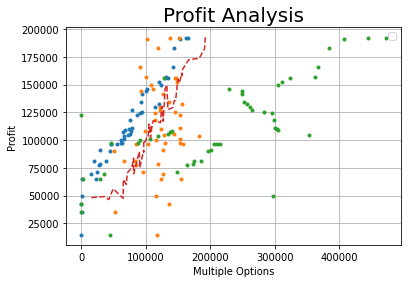

In [ ]:
model = LinearRegression()
model.fit(independent,dependent)


plt.plot(independent,dependent, '.')
plt.plot(dependent,model.predict(independent),'--')


plt.xlabel('Multiple Options')
plt.ylabel('Profit')
plt.title('Profit Analysis', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

The graph is showing about the scatter data and relation with dependent and independent variables

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.2, random_state = 0)

In [ ]:
ml = LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict = ml.predict(x_test)
print(y_predict)
print("\nY-test Values\n")
print(y_test)

[[103901.8969696 ]
 [132763.05993126]
 [133567.90370044]
 [ 72911.78976736]
 [179627.92567224]
 [115166.64864795]
 [ 67113.5769057 ]
 [ 98154.80686776]
 [114756.11555221]
 [169064.01408795]]

Y-test Values

       Profit
28  103282.38
11  144259.40
10  146121.95
41   77798.83
2   191050.39
27  105008.31
38   81229.06
31   97483.56
22  110352.25
4   166187.94


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[57730.51939511]])

In [ ]:
#R2 Score
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9393955917820569

So according to r2 score my total dependency of dependent variable to the independent variable is almost 94%

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


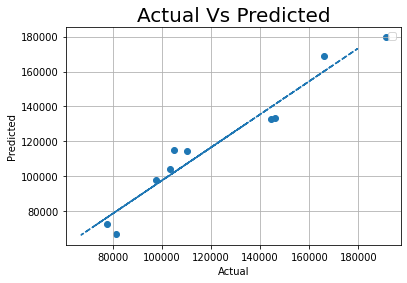

In [ ]:
model = LinearRegression()
model.fit(y_test,y_predict)


# plt.plot(independent,dependent, '.')
plt.plot(y_predict,model.predict(y_predict),'--')

plt.scatter(y_test,y_predict)

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

Since the point are not so scattered so we can say that the prediction of model is almost correct. We are checking it in next cell.


In [ ]:
#Predicted Values
ml.predict([[1315.46,115816.21,297114.46]])    #5th slide 4th last

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[57730.51939511]])

since the actual value is 49490.75 but predicted value is 57730.52

# ***QUESION 2***

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
import pandas as pd
df2 = pd.read_csv ('diabetes.csv')
df2.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
print(df2.keys())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


It is giving the features 

In [ ]:
print(df2.values)




print("Number of coloumns and rows: " , df2.shape)       #for number of rows and coloumns  


print(df2.describe())    #Details of rows and coloumns numbers

print("\nWhat are the coloumns\n", df2.columns)
print("\nUniques Values in each coloumn : \n", df2.nunique())

df2['Glucose'].unique()

[[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]
Number of coloumns and rows:  (768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.00000

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190])

Exploratory Data Analysis is showing the number of coloumns , Total number of coloumns and rows, Description of rows and coloumns , Uniques values in each coloumn etc.)

In [ ]:
df2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking if there is no null values

In [ ]:
#droping the redundant data

diabetes_data = df2.drop(['Pregnancies', 'Age' , 'Outcome'],axis = 1)

diabetes_data.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction
0,148,72,35,0,33.6,0.627
1,85,66,29,0,26.6,0.351
2,183,64,0,0,23.3,0.672
3,89,66,23,94,28.1,0.167
4,137,40,35,168,43.1,2.288


EDA to show that if we want to drop any coloumn for testing our data . we can do 

In [ ]:
independent2 = df2[['Glucose', 'BloodPressure']]
dependent2 = df2[['Outcome']]
print(independent2, dependent2)

     Glucose  BloodPressure
0        148             72
1         85             66
2        183             64
3         89             66
4        137             40
..       ...            ...
763      101             76
764      122             70
765      121             72
766      126             60
767       93             70

[768 rows x 2 columns]      Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


As we are taking two independent variables as Glucose and Blood Pressure and Dependent variable as outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(independent2,dependent2,test_size=0.2, random_state = 0)

Splitting the dataset for training and testing 

In [ ]:
clf = KNeighborsClassifier(n_neighbors=3)
# clf.fit(features, label)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7207792207792207

Assuming the number of neighbours as 3 and performtraining and testing data

In [ ]:

print(len(y_test))
print("Test Actual Values : ",y_test)
y_predict = clf.predict(x_test)
print(y_predict)

154
Test Actual Values :       Outcome
661        1
122        0
113        0
14         1
529        0
..       ...
476        1
482        0
230        1
527        0
380        0

[154 rows x 1 columns]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


AS WE WANT TO KNOW THE TOTAL NUMBER OF TESTING DATA . WHAT ARE THE ACTUAL TESTING DATA AND WHAT ARE THE DATA WE GOT AS PREDICTED

In [ ]:
preds =clf.predict([[122,70]])
pred2 = clf.predict([[170,74]])
print(preds , pred2)

[0] [1]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


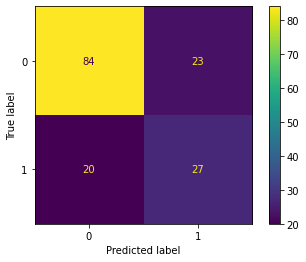

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)

Just to check if we got the predicted outcome as same as the actual outcome

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

We are changing the neighbours to 5 and againg training the model

In [ ]:
y_pred = classifier.predict(X_test)

we are assigning y_pred as testing data 

In [ ]:
print("Y test - > \n" , y_test)
print("\nY Predict\n", y_pred)

Y test - > 
      Outcome
661        1
122        0
113        0
14         1
529        0
..       ...
476        1
482        0
230        1
527        0
380        0

[154 rows x 1 columns]

Y Predict
 [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


Again we are checking the actual y test value and y predicted value

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)

ac = accuracy_score(y_test,y_pred)

For the confusion matrix we are getting with y predicted value and y test value

In [ ]:
print(cm,"\n", ac)

[[91 16]
 [21 26]] 
 0.7597402597402597


In [ ]:
from sklearn.metrics import plot_confusion_matrix
# plot_confusion_matrix(clf, x_test, y_test)


plot_confusion_matrix(clf, y_test, y_pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Outcome
Feature names seen at fit time, yet now missing:
- BloodPressure
- Glucose

  warnings.warn(message, FutureWarning)


ValueError: ignored

In [ ]:
#Predicted Values

predicted_Difference = pd.DataFrame(['Actual Value :',y_test, 'Predicted Value :',y_predict ])
print(predicted_Difference)

                                                   0
0                                     Actual Value :
1       Outcome
661        1
122        0
113    ...
2                                  Predicted Value :
3  [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, ...


In [ ]:
from sklearn.metrics import classification_report
# y_true = [0, 1, 2, 2, 2]
# y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, target_names=target_names))
              

              precision    recall  f1-score   support

     class 0       0.81      0.85      0.83       107
     class 1       0.62      0.55      0.58        47

    accuracy                           0.76       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.75      0.76      0.76       154



Classification report for the entire operation we did above

Different Value of k

In [ ]:
classifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 1)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, p=1)

In [ ]:
y_pred2 = classifier.predict(X_test)

In [ ]:
print("Y test - > \n" , y_test)
print("\nY Predict\n", y_pred)

Y test - > 
      Outcome
661        1
122        0
113        0
14         1
529        0
..       ...
476        1
482        0
230        1
527        0
380        0

[154 rows x 1 columns]

Y Predict
 [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)

In [ ]:
print(cm ,"\n" ac)

[[91 16]
 [21 26]] 0.7597402597402597
